In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# **Python Bootcamp Week 4**

![](https://cdn.dribbble.com/users/1915425/screenshots/4296424/penguin-05.jpg)

**[Who is this guy](https://www.linkedin.com/in/daniel-junxiao-ma-b8283391/)**?

<image src='https://media-exp1.licdn.com/dms/image/C5603AQHNwKcbZgHBTw/profile-displayphoto-shrink_400_400/0/1589214805469?e=1613606400&v=beta&t=VfMZerdjTfxxckf2daBT4zxOWKUqsCAwRGe8_mMhdl0'  width="400" height="400">

- [x] A nerd obssessed with ML 
- [x] Data Scientist working at Statistic Canada
- [x] Phd in Econ working on his last term
- [x] Passionate & ambitious learner
- [x] Head instructor of the ML bootscamp



## Introduction to Machine Learning (ML): Supervised Machine Learning

### **Outline**

- Machine Learning: *what, why and how*? 
- Supervised Machine Learning: Support Vector Machine
  - Theoretical Framework
  - Empirical Application

### 1.1 What is Machine Learning? 


---


Machine Learning (ML) is defined as the use algorithms and computational statistics to learn from data without being explicitly programmed. It is a subsection of the artificial intelligence domain within computer science. 

Machine leanring is everywhere in our life. It covers many techincal tools we use every day and topics that are academically quite popular. 

Google search, Youtube video recommendation, Amazon production recomendation, image recognization, self-driving system... you name it, are all the popular areas that utilized huge amount of knowledge of ML. [Yufeng Guo](https://www.linkedin.com/in/yufeng/), the developer and Machine Learning Advocate at Google Cloud gives a very clear straightforward [defition of ML](https://www.youtube.com/watch?v=HcqpanDadyQ). 

![](https://i.pcmag.com/imagery/lineups/05OQSA4rlL7876eIsOPWHNV-1.1569492718.fit_lim.size_1200x630.jpg)

![](https://www.cubix.co/storage/app/uploads/public/5f6/c9c/b61/5f6c9cb61c5d4064699799.png)

### 1.2 Why is Machine Learning so important? 


---


Today's world is a digitalized world full of data. Our daily trabsaction records are stored as data in the data center of banks. Our music listening histories are recorded as data by Spotify and Apply Music for recommendation purposes. ML is the ultimate powerful tool that allows to have significant insights into the possible benefits we can get from the data. 

Following is one of my personal project at a Canadian Loyalty Program. This goal of the project is to put consumers into different preference groups only based on peronsal trasaction records. 

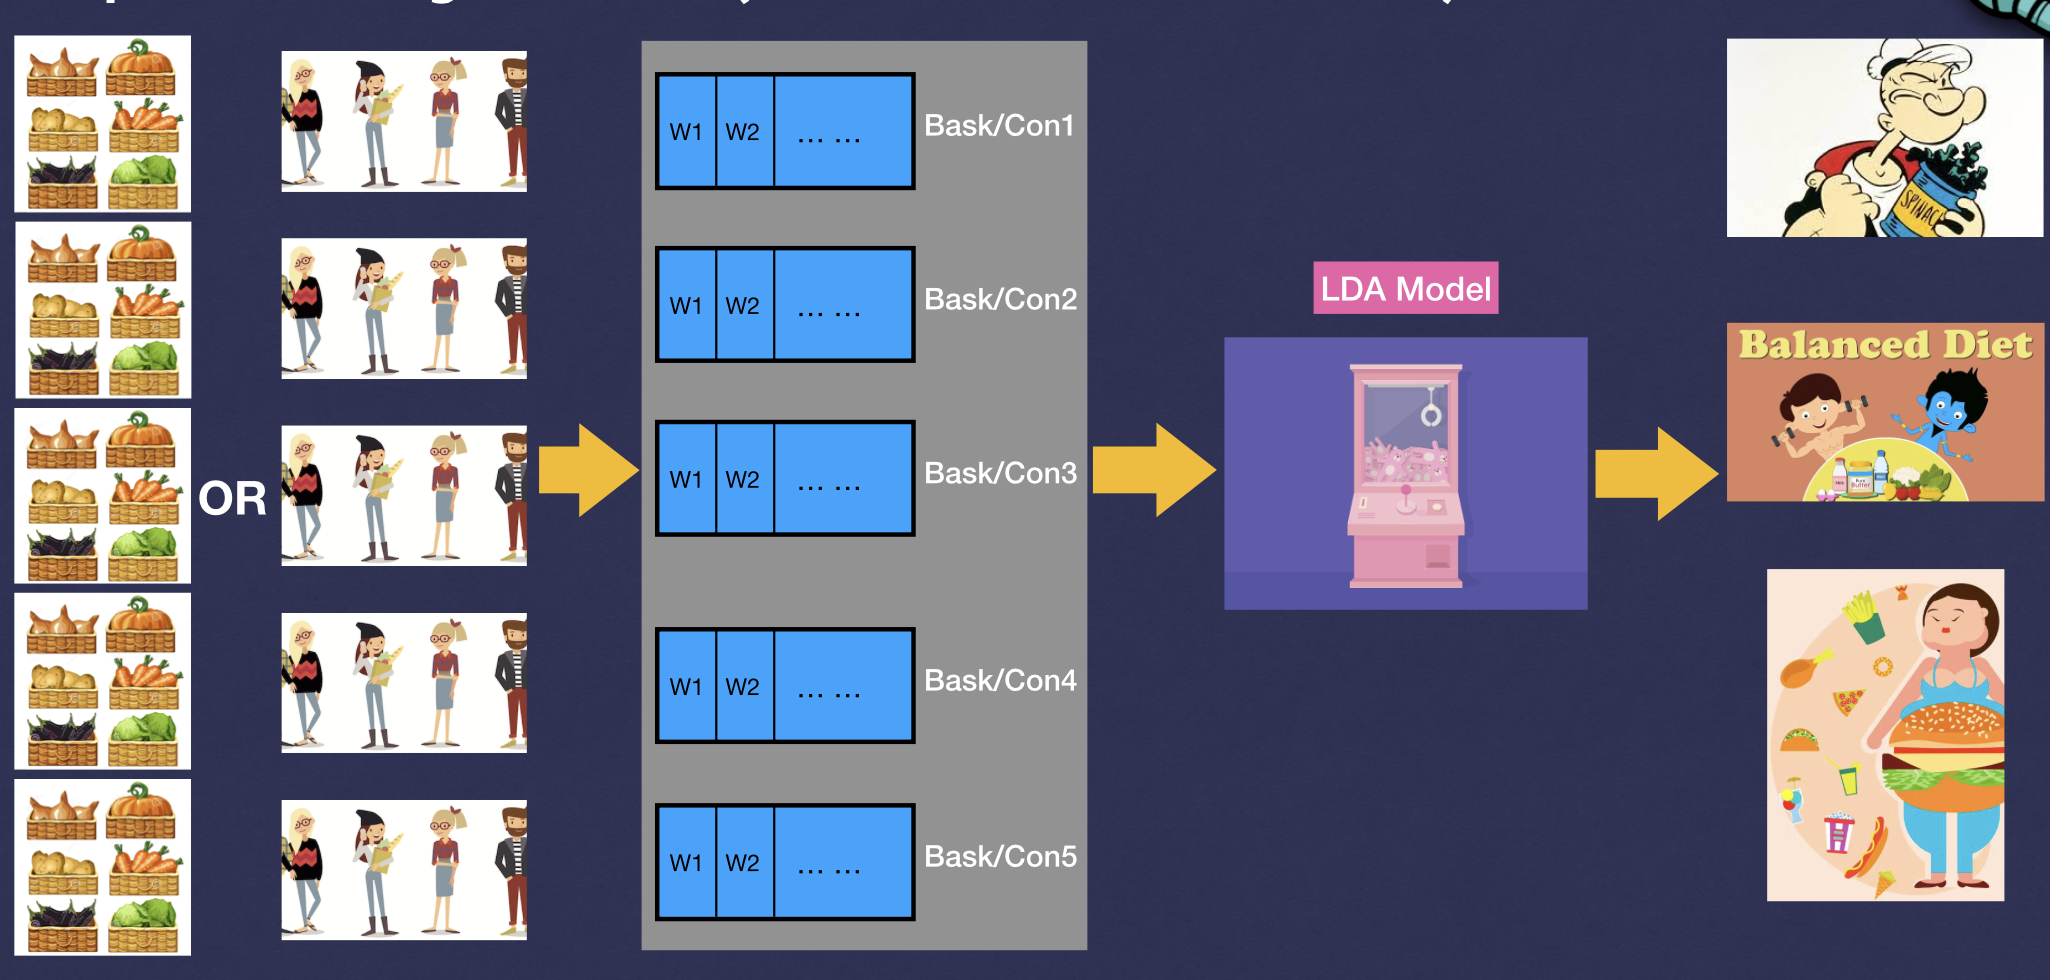

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Machine Learning CADASA/Chapter 1 + Intro/1_1.png", width=1200, height=700)

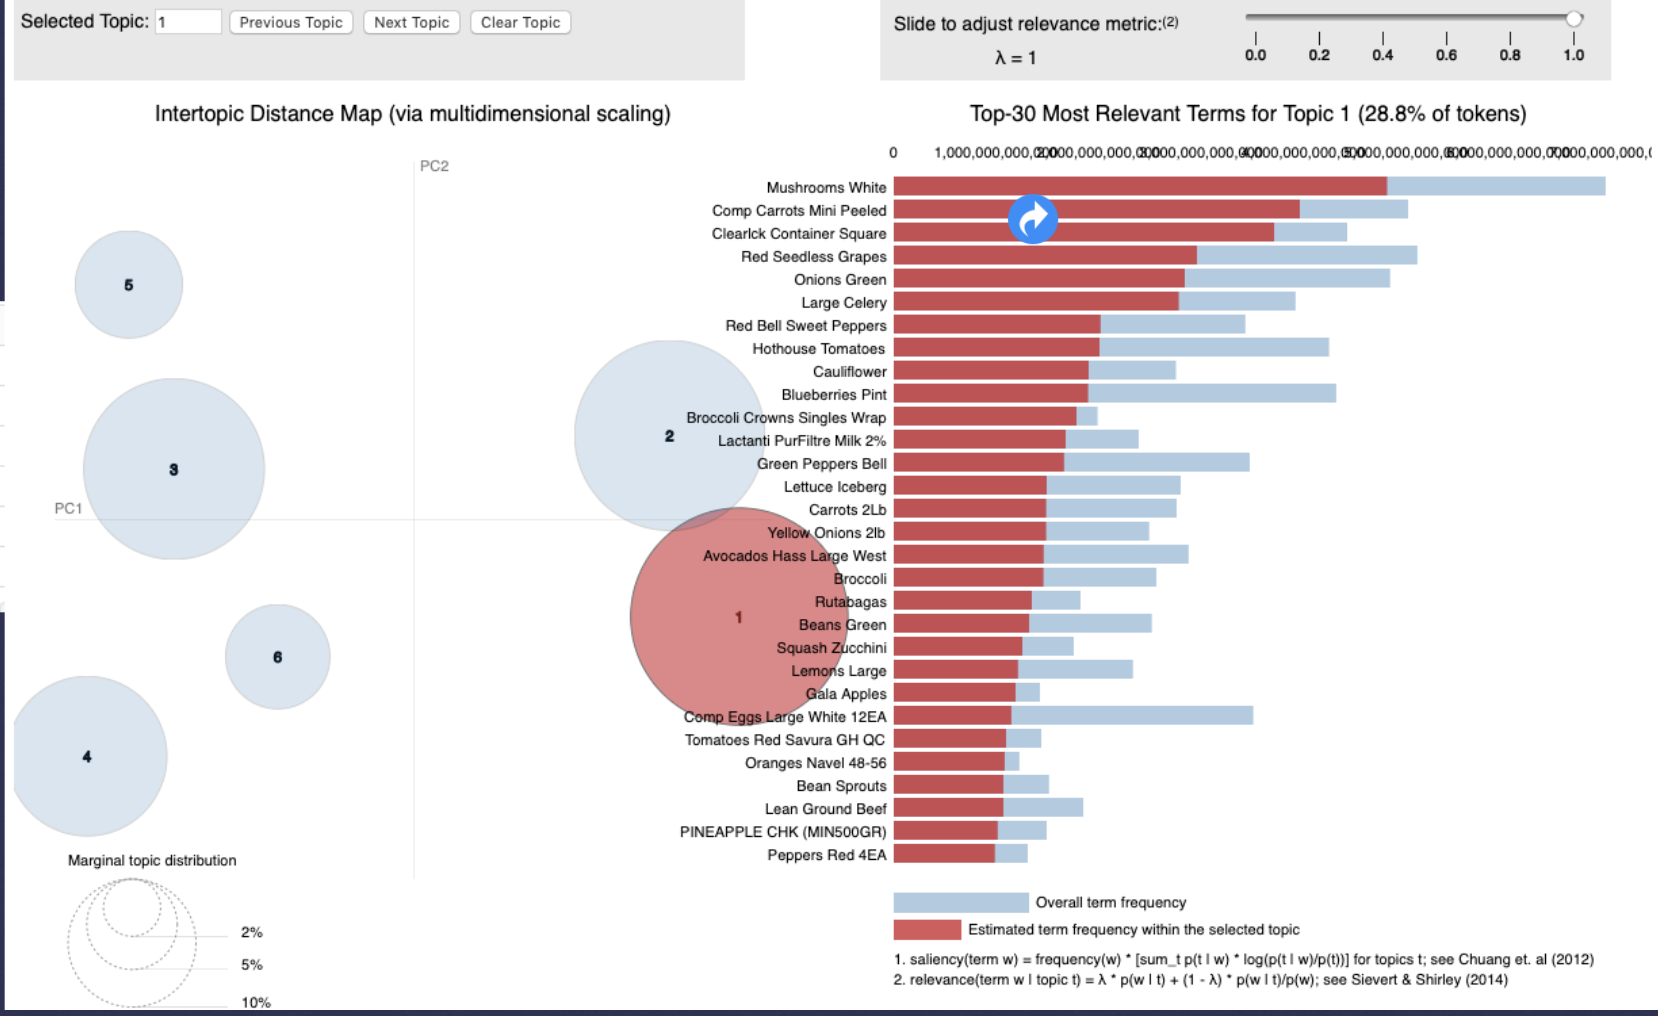

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Machine Learning CADASA/Chapter 1 + Intro/1_2.png", width=1200, height=700)

### 1.3 Simple Machine Learning Road Map
---

First of all, traditional ML includes two main parts: Supervised Machine Learning and Unsupervised Machine Leanring. 

- <font color = 'color'>Supervised Machine Learning </font>

  A supervised learning algorithm takes **labeled data** and creates a model that can make predictions given new data.
   - <font color ='blue'>Regression</font>. e.g. predicting the future price of a stock based on past prices movements. Usually, these type of models have **continuous** outcome variables. 

   ![](https://lawtomated.com/wp-content/uploads/2020/08/dataset-plot-y0.5x3-1-1170x657.png) 

   - <font color ='blue'>Classification</font>. e.g. In a classification problem, there might be test data consisting of photos of animals, each one labeled with its corresponding name. Usually, these type of models have **categorical** outcome variables. 
![](https://miro.medium.com/proxy/1*6lFfmQ_NghSTWkb0Q4Pc2A.png)
- <font color = 'color'>Unsupervised Machine Learning </font>
  
  Unsupervised learning is when we are dealing with data that has **not been labeled or categorized**. The goal is to find patterns and create structure in data in order to derive meaning.
    - <font color ='blue'>Clustering</font>. Clustering is grouping alike data. Data in one group should have similar properties or features to one another. However, when compared to data of another group they should have highly dissimilar properties. [Example](https://helboukkouri.github.io/embedding-visualization/#/galaxy/word2vec_en?cx=-3272&cy=1489&cz=12042&lx=0.0055&ly=0.9910&lz=-0.0430&lw=0.1264&ml=150&s=1.75&l=1&v=data)
    - <font color ='blue'>Dimensionality Reduction</font>. Dimensionality reduction is the compressing of data by removing random variables and holding onto principle ones without losing the structure and meaningfulness of the dataset. The usefulness of dimensionality reduction comes from making the data easier to store, quicker to run computations over, and easier to view in data visualizations. It is also helpful in removing false signals or noise from a model which helps improve its performance.
    ![](https://miro.medium.com/max/698/1*WVFe7w1rzZWsmghdvaoXag.png)

Except for these models, Machine Learning also have a great overlap with other advanced AI topics, such as <font color='blue'>Reinforcement Learning and Deep Leanring</font>. Reinforcement learning uses a reward system and trial-and-error in order to maximize the long-term reward. e.g. AlphaGo. Deep learning utilizes neural networks which, just like the human brain, contain interconnected neurons that can be activated or deactivated. Deep learning can fall into supervised and unsupervised learning subsections of ML.

In this course, we will mianly focus on the traditional ML, which includes <font color = 'color'>Supervised Machine Learning </font> and <font color = 'color'>Unsupervised Machine Learning </font>. 

### 1.4 Machine Learning Model Structure
---

In order to do the "learning" part of ML, no matter prediction or clusetring, there are several curcial steps one needs to take. The following steps are the necessary steps for a complete Machine Leanring project in the industry. 

1. **Data Collecting/Cleaning/Preparation** 
   
   Data is the fundamental of a ML project. Thus it is very important to make sure the data collection process unbiaded and objective. Organizing the data into the right format and implementing sanity check on the data obtained are also a key part of the initial stage of the project.  
2. **Explanatory Data Analysis(EDA)**

   Exploratory Data Analysis (EDA) is the process of visualizing and analyzing data to extract insights from it. In other words, EDA is the process of summarizing important characteristics of data in order to gain better understanding of the dataset.
  - maximize insight into a data set;
  - uncover underlying structure;
  - extract important variables;
  - detect outliers and anomalies;
  - test underlying assumptions;
  - develop parsimonious models; and
  - determine optimal factor settings
3. **Feature Engineering**

   Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. 

---
        "Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data"
---

4. **Model Building**
   
   With the data ready, the next problem we need to ask ourselves would be: *what kind of model should we use for the prject*? 

   After this we need to answer a deeper question: *what are the pros and cons of the model and what parameters and data are needed for this model*? 
5. **Model Training and Evaluation**

   In this stage, we need to evaluate our model using all kinds of metrics and find the potential issues with the model. Then we need validate our model by solving some potential problems that come with the model and data, such as overfitting problem and model accuracy problem. Classic validation tecniques including *cross-validation and regularization* will be cover in subsequent chapters.
6. **Model Optimization: parameter tuning** 
   This step involves how to imporve the model performance by adjusting the hyperparamters in the model. For example, if we were to predict the labels of the image using *Random Forest* model, we will need to adjust many [hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to imporve the tree model accuracy, such as `max_depth` of the tree or `min_samples_split` or the `criterion` used to split the tree. 
6. **Into Production** 

### 1.5 Support Vector Machine



Let's consider a binary classification problem of only 2 classes. 
- Two classes: red and yellow
- Can we do the classification using just single lines? Or alternatively just simple linear classification? <font color='red'> Yes, we can but we'd better not to. Why?<font color='red'>


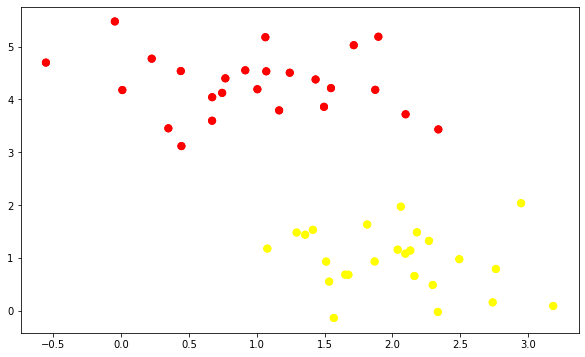

In [ ]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

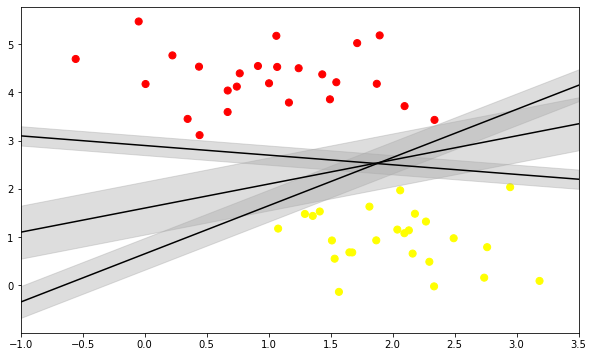

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

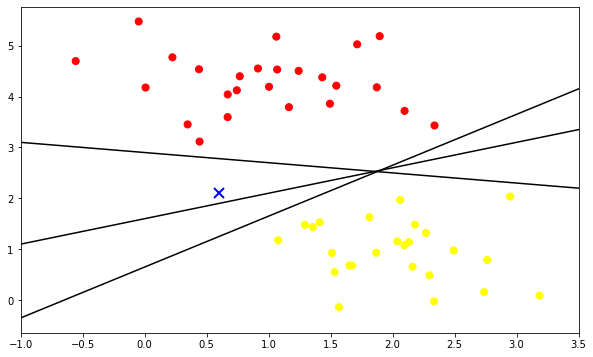

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!

#### Definition

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a **separating hyperplane**. In other words, given labeled training data (supervised learning), the algorithm outputs an **optimal hyperplane** which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='navy',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='orange',
                   alpha=.5);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

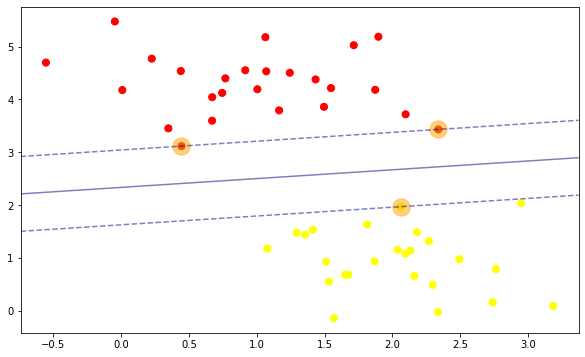

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the **training points just touch the margin**: they are indicated by the orange circles in this figure. These points are the pivotal elements of this fit, and are known as the **support vectors**, and give the algorithm its name.

#### Loss Function (Optional)

SVM has a very interesting loss functon. Consider a binrary classification problem with only 2 classes with label 1 (positive class) and -1 (negative class) respectively, then the [**soft margin**](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589#:~:text=Hard%20margin%20SVM%3A&text=Explanation%3A%20when%20the%20point%20X3,classified%20in%20the%20positive%20domain.) (Theoretically, there are the hard margin and soft margin SVM, but latter is more popular and commonly used these days as the former has 0 tolerance for missclassifcations)  loss function will be: 

$$\underset{w_{i}}{Min} \big( \frac{1}{2}||w||^2 + C\sum^{N}_{i=1} \epsilon_i\big )  s.t. \quad y_i(w^TX_i$+b) \geq 1-\epsilon_i \quad \forall \epsilon_i\geq 0$$

- If $y_i(w^TX_i+b) \geq 1-\epsilon_i$ then constriant will be satisfied and no contribution is made to the loss. 
- If $y_i(w^TX_i+b) < 1-\epsilon_i$ then constriant term will not be satisfied and contribution is made to the loss. Alternatively, the points that don't satisfy the constraint (inside the margin) will be penalized. 
- Small $C$ makes the cost of misclassificaiton low ("soft margin"), thus allowing more of them for the sake of wider "cushion".

- Large $C$ makes the cost of misclassification high ('hard margin"), thus forcing the algorithm to explain the input data stricter and potentially overfit.

## Kernel Tricks

One of the powerful strength of SVM is that it can handle nonlinearly separable data points. Consider the following example, can we separate one class from another through just a linear magin? 

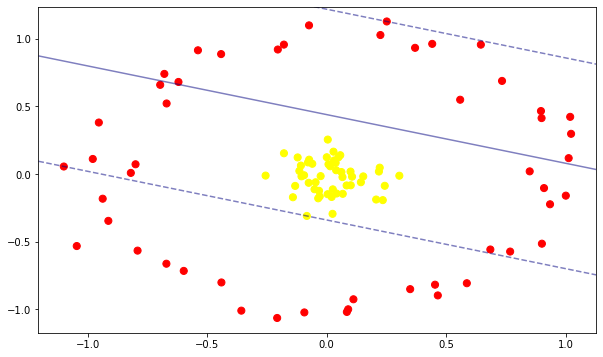

In [ ]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear', random_state=25).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will ever be able to separate this data. But we can think about how we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a *radial basis function* centered on the middle clump:

In [ ]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-150, 150], azip=(-180, 180),
         X=fixed(X), y=fixed(y));


interactive(children=(Dropdown(description='elev', options=(-150, 150), value=-150), IntSlider(value=30, descr…

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, $r=0.7$.

Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a **kernel transformation**, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting $N$ points into $N$ dimensions—is that it might become very computationally intensive as $N$ grows large. However, because of a neat little procedure known as the **kernel trick**, a fit on kernel-transformed data can be done implicitly—that is, without ever building the full $N$-dimensional representation of the kernel projection! This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

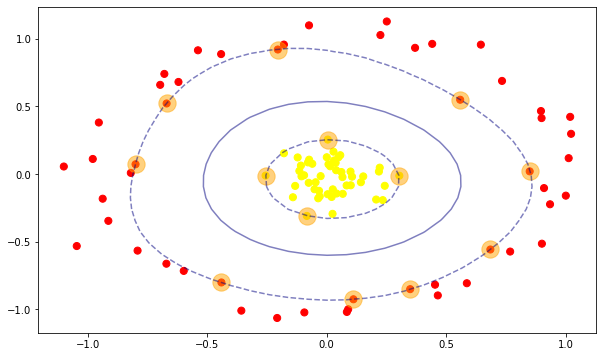

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y);

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

#### Empirical Coding

Now let's turn to the appplication of SVM. Let's take a look at the facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. Our goal is to assign each pic to the righ public figure. Each data point has a picture labeled with a name. A fetcher for the dataset is built into Scikit-Learn:

In [1]:
from sklearn.datasets import fetch_lfw_people
# Labeled Faces in the Wild dataset

In [2]:
faces = fetch_lfw_people(min_faces_per_person=80)

print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


Let's see which public figures that we are looking at:

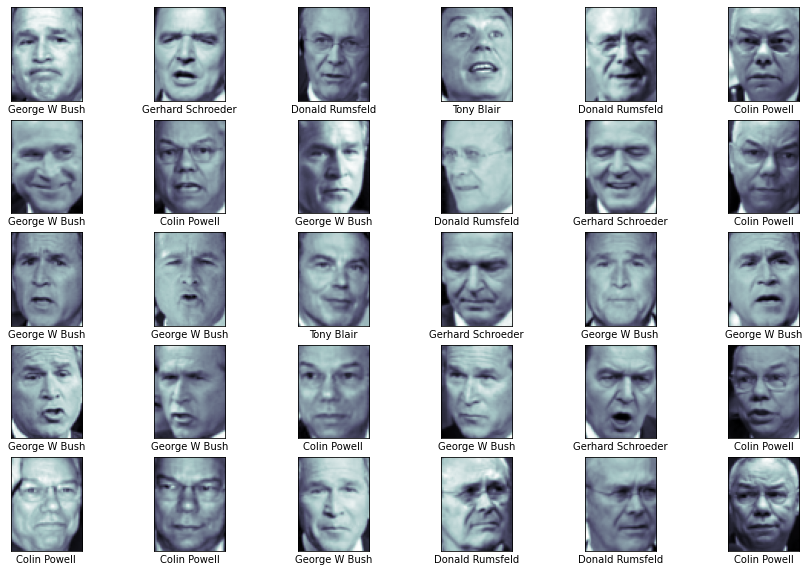

In [81]:
plt.rcParams['figure.figsize']=(15, 10)
fig, ax = plt.subplots(5, 6)
for i, ax_i in enumerate(ax.flat):
  ax_i.imshow(faces.images[i], cmap='bone')
  ax_i.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from scipy.stats import loguniform

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis (see [Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)) to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [100]:
pca = PCA(n_components=150, random_state=24)
svc = SVC(kernel='rbf', random_state=24, class_weight='balanced')
pl = make_pipeline(pca, svc)

paarms_to_run = {'svc__C': loguniform(0.1, 1000).rvs(size=100),
                 'svc__gamma': loguniform(0.001, 10).rvs(size=100)}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
scores = ['f1_macro', 'f1_weighted', 'f1_micro']

For the sake of testing our classifier output, we will split the data into a training and testing set:

In [101]:
X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                    faces.target,
                                                    random_state=24,
                                                    test_size=0.3)

Finally, we can use a grid search cross-validation to explore combinations of parameters. So what key parameters do we adjust for the optimal model? This depends on what models you are using. 
For SVM, there exist several key parameters: 

- `C`, which controls the margin hardness.  It is a regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- `kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}`, default=’rbf’
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.

- `gamma` (which controls the size of the radial basis function kernel, by default). Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Technically speaking, large gamma leads to high bias and low variance models, and vice-versa.

![](https://qph.fs.quoracdn.net/main-qimg-531aaee161be90bf810f8eaff9d364d9)

In [102]:
search = RandomizedSearchCV(estimator=pl,
                            param_distributions=paarms_to_run,
                            n_iter=10,
                            scoring=scores,
                            refit='f1_weighted',
                            cv=kfold,
                            random_state=24)

%time search.fit(X_train, y_train)    

print(f'The best parameters for the SVM model is {search.best_params_}')
print(f'The best score for the SVM model is {search.best_score_}')


CPU times: user 34.9 s, sys: 9.96 s, total: 44.9 s
Wall time: 25.9 s
The best parameters for the SVM model is {'svc__gamma': 0.5138587701554937, 'svc__C': 11.056480732402775}
The best score for the SVM model is 0.29912028907677196


Now let's save the model in case we will use it for further prediction.

In [103]:
import joblib
joblib.dump(search.best_estimator_, 'best_SVM.joblib')

['best_SVM.joblib']

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [109]:
model = search.best_estimator_
%time  y_pred = model.predict(X_test);

CPU times: user 117 ms, sys: 63.9 ms, total: 181 ms
Wall time: 103 ms


Let's take a look at a few of the test images along with their predicted values:

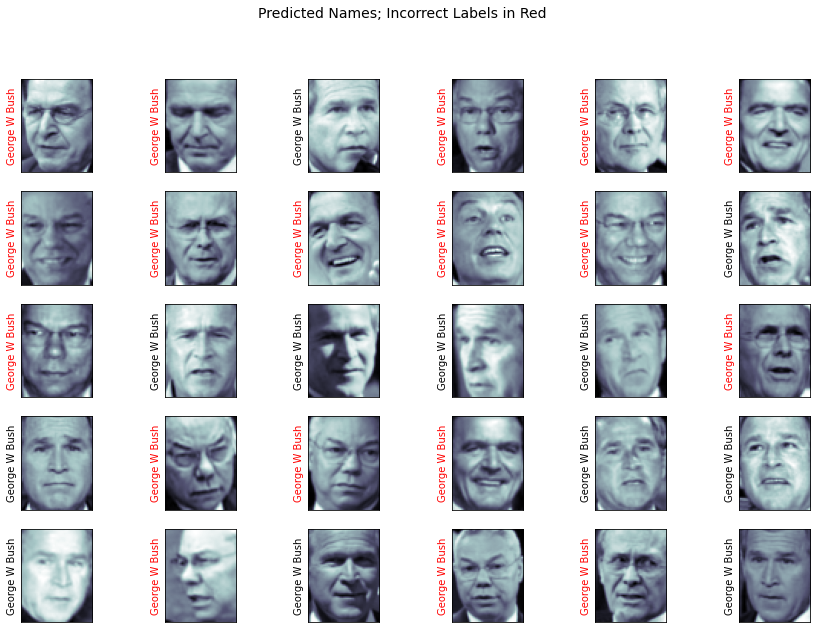

In [105]:
fig, ax = plt.subplots(5, 6)
for i, ax_i in enumerate(ax.flat):
  ax_i.imshow(X_test[i].reshape(62, 47), cmap='bone')
  ax_i.set(xticks=[], yticks=[]),
  ax_i.set_ylabel(faces.target_names[y_pred[i]], 
                  color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);  

We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [106]:
print(f'F1-weighted score on the test set is {search.score(X_test,y_test)}')

F1-weighted score on the test set is 0.28577467765800035


In [107]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_pred, y_test, 
                            target_names=faces.target_names))


                   precision    recall  f1-score   support

     Colin Powell       0.00      0.00      0.00         0
  Donald Rumsfeld       0.00      0.00      0.00         0
    George W Bush       1.00      0.46      0.63       342
Gerhard Schroeder       0.00      0.00      0.00         0
       Tony Blair       0.00      0.00      0.00         0

         accuracy                           0.46       342
        macro avg       0.20      0.09      0.13       342
     weighted avg       1.00      0.46      0.63       342



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We might also display the confusion matrix between these classes:

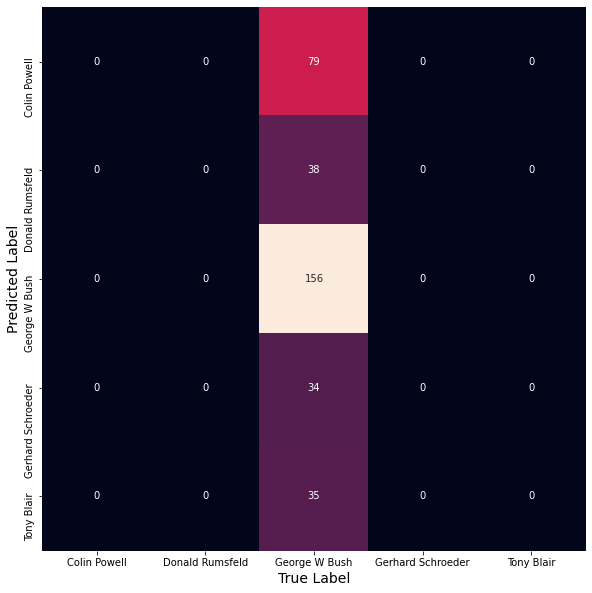

In [108]:
mat = confusion_matrix(y_pred, y_test)
sns.heatmap(mat.T, square=True, annot=True,
            fmt='d', cbar=False, xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('True Label', fontsize=14)
plt.ylabel('Predicted Label', fontsize=14);


For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation. For this kind of application, one good option is to make use of OpenCV, which, among other things, includes pre-trained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.

## Conclusion

We have seen here a brief intuitive introduction to the principals behind support vector machines. These methods are a powerful classification method for a number of reasons:

- Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
- The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the probability parameter of SVC), but this extra estimation is costly.
